# Load in Packages
This requires that you download and use the Github package climate_loader_ts, accessible from https://github.com/tschultz84/climate_loader_ts.

The directory location for this package, and for the climate_analyzer_ts package itself, must then be entered into the JSON file called 'directories.json'. *Note: This JSON file is in the GITIGNORE and so was not cloned with your Github package. You need to create a new one from scratch. But it only has two entries and should be in this exact format:
{
    "climate_loader_dir" : "C:\\XXXX\\climate_loader_ts",
    "climate_analyzer_dir" : "C:\\XXXX\\climate_analyzer_ts"
}*

In [41]:

import Station_analyzer_ts as analyze
import imp
imp.reload(analyze)

<module 'Station_analyzer_ts' from 'c:\\Users\\14154\\OneDrive\\Python\\climate-projects\\climate_analyzer_ts\\Station_analyzer_ts.py'>

In [42]:

date1 = '2022-1-15'
date2 = '2022-2-9'
testout=analyze.StationAnalyzer([45.647256643331126,-111.04060494981753])

Searching closest station among 23 stations within 3.0 degrees of the reference.
Which have data for 2021 and at least as early as 1900.0.
Station ID# USC00241044, called MT BOZEMAN MONTANA STATE UNIV is complete. It's good to use.
This station is 1.0690009151710391 miles from the reference point.
Reference dates have been re-defined.
Years: 2015 to 2020.
Period Subset Included: 1-1 to 12-31.
I re-generated the baseline and reference period datasets accordingly. Their respective shapes: (2189, 6) and (20817, 6).


In [44]:
testout.change_ref_dates([2021,2022],[[2,1],[2,28]])
testout.key_metrics()

Reference dates have been re-defined.
Years: 2021 to 2022.
Period Subset Included: 2-1 to 2-28.
I re-generated the baseline and reference period datasets accordingly. Their respective shapes: (56, 6) and (1595, 6).


,Analysis Timeframe,Time Period Covered,TMID Average (F) Over Entire period,Max. Temp. (F) over period,Date of Max. Temperature,Min. Temp. (F) over period,Date of Min. Temperature
0,All Time,1895-1-1 to 2022-5-13,43.394227,100.04,"[1931-7-21, 2002-7-12, 2002-7-13, 2002-7-14, 2...",-43.06,[1936-2-8]
1,Reference Period,2-1 to 2-28 in 2021 to 2022,20.799821,51.98,"[2021-2-3, 2022-2-14]",-22.00,[2021-2-13]
2,Baseline Period,2-1 to 2-28 in 1895 to 1955,23.326688,62.96,[1932-2-27],-43.06,[1936-2-8]


In [40]:
testout.period_information

Reference Period Start                               [2021-02-01 00:00:00]
Reference Period End                                 [2022-02-28 00:00:00]
Baseline Period Start                                [1895-02-01 00:00:00]
Baseline Period End                                  [1955-02-28 00:00:00]
First Date in Subannual Reference Period Analysis      2021-02-01 00:00:00
Last Date in Subannual Reference Period Analysis       2022-02-28 00:00:00
First Unique DOY in Reference Period                                    32
Last Unique DOY in Reference Period                                     59
dtype: object

In [26]:
#Test some 

32

In [90]:
pd.to_datetime("2010-10",format="%Y-%j").to_julian_date()

2455206.5

In [2]:
#Example of a load: Loading weather in Bozeman, Montana.
#This station has over 100 years of data, so it takes a while.
bzdata=load.LoadStation([45.647256643331126,-111.04060494981753],True,15) #Loading in Bozeman, MT coordinates


Searching closest station among 23 stations within 3.0 degrees of the reference.
Which have data for 2021 and at least as early as 1900.0.
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USC00241044.csv (10.557093 MB). Please wait while the file is transferred.
Time to download this station data: 5.821533679962158 seconds.
I dropped 1892.0 for having only 8 months of data.
I dropped 1893.0 for having only 5 months of data.
I dropped 1894.0 for having only 9 months of data.
I dropped 1898.0 for having only 9 months of data.
I dropped 1905.0 for having only 11 months of data.
I dropped 1906.0 for having only 11 months of data.
I dropped 1963.0 for having less than 15.0s days in month # 9.0.
I dropped 1995.0 for having only 11 months of data.
Time to clean up this data: 0.20248913764953613 seconds.
-------------------------------------
Checking the completeness of the data.
Station ID# USC00241044, called MT BOZEMAN MONTANA STATE UNI

In [3]:
#Quickly review the station information. 
print("Station Meta Information:")
print(bzdata.station_information)

Station Meta Information:
Weather Station Name                                      MT BOZEMAN MONTANA STATE UNIV
Station ID                                                                  USC00241044
Earliest year in station record                                                  1895.0
Most recent year in record                                                       2022.0
Number of years in record meeting quality requirements                              122
Station Latitude                                                                45.6622
Station Longitude                                                             -111.0464
Reference Point Latitude                                                      45.647257
Reference Point Longitude                                                   -111.040605
Miles from Reference Point                                                     1.069001
dtype: object


In [10]:
# Take a look at the output of station_data, the key variable that is passed to StationAnalyzer.
#Each row corresponds to a single day, and contains TMAX, TMIN, and TMID, values. The columns are as follows:
#[YEAR,MONTH, DAY OF MONTH, DAY OF YEAR, TMAX, TMIN, TMID].
print(bzdata.station_data[10:20])

[[ 1.895e+03  1.000e+00  1.100e+01  1.100e+01  4.208e+01  3.002e+01
   3.605e+01]
 [ 1.895e+03  1.000e+00  1.200e+01  1.200e+01  4.604e+01  3.002e+01
   3.803e+01]
 [ 1.895e+03  1.000e+00  1.300e+01  1.300e+01  4.406e+01  3.398e+01
   3.902e+01]
 [ 1.895e+03  1.000e+00  1.400e+01  1.400e+01  3.002e+01  1.508e+01
   2.255e+01]
 [ 1.895e+03  1.000e+00  1.500e+01  1.500e+01  1.706e+01 -4.000e-02
   8.510e+00]
 [ 1.895e+03  1.000e+00  1.600e+01  1.600e+01  1.904e+01  3.920e+00
   1.148e+01]
 [ 1.895e+03  1.000e+00  1.700e+01  1.700e+01  3.596e+01  8.060e+00
   2.201e+01]
 [ 1.895e+03  1.000e+00  1.800e+01  1.800e+01  3.902e+01  1.706e+01
   2.804e+01]
 [ 1.895e+03  1.000e+00  1.900e+01  1.900e+01  3.092e+01  2.192e+01
   2.642e+01]
 [ 1.895e+03  1.000e+00  2.000e+01  2.000e+01  2.300e+01  1.202e+01
   1.751e+01]]


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1895-1-1 to 2022-5-9,43.394307,332.752284,100.04,"[1931-7-21, 2002-7-12, 2002-7-13, 2002-7-14, 2...",-43.06,[1936-2-8]
1,Reference Period: 2022-1-15 to 2022-2-9,26.807692,64.513241,51.08,[2022-2-8],-11.02,"[2022-2-2, 2022-2-3]"
2,Baseline Period: 1-15 to 2-9 in 1895 to 1954,20.469052,212.203764,62.06,"[1934-2-1, 1934-2-2]",-43.06,[1936-2-8]


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus BasEline Temperature Change,6.33F,0.027172,False,0.01
1,30 year warming trend,-0.1 Farenheit per decade,0.919217,False,0.01


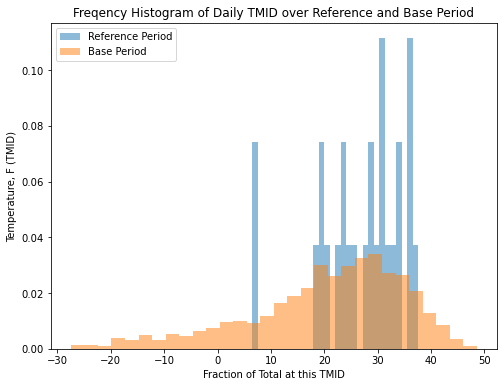

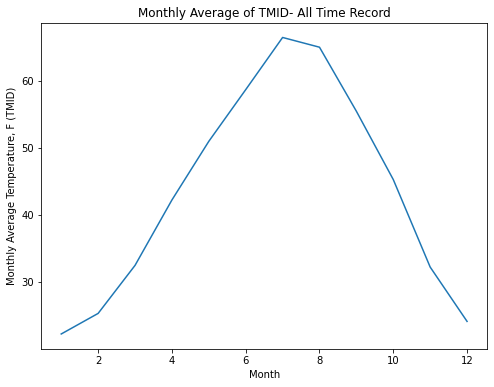

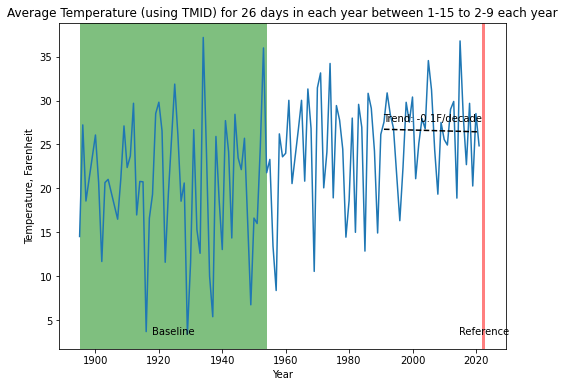

[[1895.           14.52961538]
 [1896.           27.22653846]
 [1897.           18.56576923]
 [1900.           26.07730769]
 [1901.           20.68769231]
 [1902.           11.68423077]
 [1903.           20.66692308]
 [1904.           21.03038462]
 [1907.           16.49923077]
 [1908.           21.09961538]
 [1909.           27.10884615]
 [1910.           22.38038462]
 [1911.           23.68884615]
 [1912.           29.68769231]
 [1913.           16.98384615]
 [1914.           20.795     ]
 [1915.           20.75      ]
 [1916.            3.70884615]
 [1917.           16.61      ]
 [1918.           19.32038462]
 [1919.           28.51769231]
 [1920.           29.80884615]
 [1921.           26.54461538]
 [1922.           11.59769231]
 [1923.           19.39653846]
 [1924.           25.66192308]
 [1925.           31.86846154]
 [1926.           26.08769231]
 [1927.           18.545     ]
 [1928.           20.615     ]
 [1929.            3.43884615]
 [1930.           11.53884615]
 [1931. 

In [4]:
#Analyze the climate here for the 10 years from 2011 to 2021.
#This compares the entire years in 2011 to 2021 to the entire year in the oldest reference period.
#which was 1895 to 1927.

date1 = '2022-1-15'
date2 = '2022-2-9'
#Automatically displays all information.
bzcalc=analyze.StationAnalyzer(bzdata,date1,date2,display=True)
#But also see the raw data behind the averages fro each year.
print(bzcalc.all_years_mean)


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1895-1-1 to 2022-2-6,43.415295,332.874501,100.04,"[1931-7-21, 2002-7-12, 2002-7-13, 2002-7-14, 2...",-43.06,[1936-2-8]
1,Reference Period: 2022-1-5 to 2022-2-5,24.867500,83.964094,46.94,"[2022-1-18, 2022-1-23]",-11.02,[2022-2-3]
2,Baseline Period: 1-5 to 2-5 in 1920 to 1954,20.686002,204.120201,62.06,"[1934-2-1, 1934-2-2]",-36.04,"[1949-1-24, 1949-1-25]"


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,4.18F,0.154061,False,0.01
1,30 year warming trend,0.65 Farenheit per decade,0.435623,False,0.01


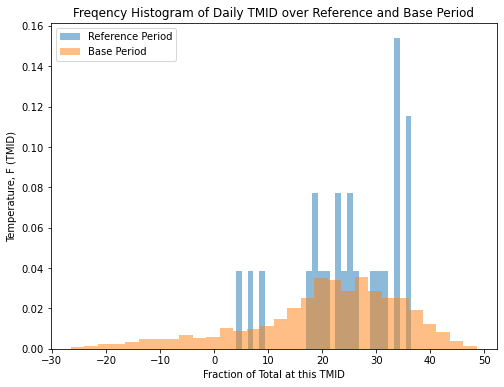

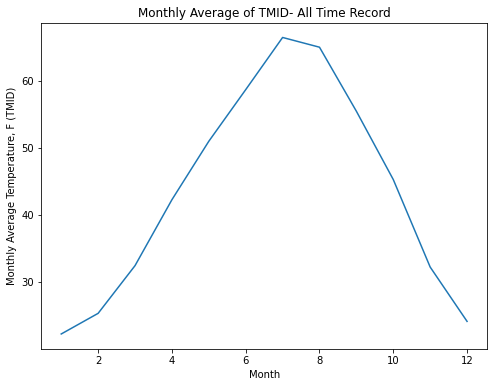

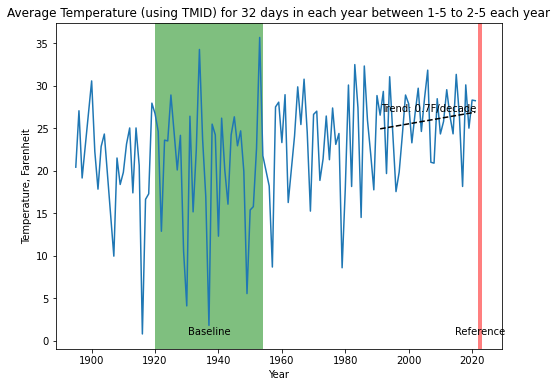

In [7]:
#Analyze the climate here for the month of December in 2021.
#Analyze the climate here for the 10 years from 2011 to 2021.
#This compares the entire years in 2011 to 2021 to the entire year in the oldest reference period.
#which was 1895 to 1927.

date3 = '2022-1-5'
date4 = '2022-2-5'
bzcal1c=analyze.StationAnalyzer(bzdata.station_data,date3,date4,display=True)

In [18]:
obdata=load.LoadStation([37.755663644,-122.506497974],True) #Loading in Ocean Beach, SF coordinates

Searching closest station among 47 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1920
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USC00044500.csv (7.36785MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,27,31,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.901606559753418
I dropped 1906.0 for having only 10 months of data.
I dropped 1907.0 for having only 11 months of data.
I dropped 1908.0 for having only 11 months of data.
I dropped 1909.0 for having only 11 months of data.
I dropped 1910.0 for having less than 20 days in month #12.0
I dropped 1911.0 for having less than 20 days in month #1.0
I dropped 1911.0 for having less than 20 days in month #2.0
I dropped 1911.0 for having less than 20 days in month #4.0
I dropped 1911.0 for having less than 20 days in month #5.0
I dropped 1911.0 for having less than 20 days in month #6.0
I dropped 1913.0 for having less than 20 days in month #4.0
I dropped 1915.0 for having less than 20 days in month #11.0
I dropped 1918.0 for having less than 20 days in month #7.0
I dropped 1918.0 for having less than 20 days in month #8.0
I dropped 1927.0 for having only 11 months of data.
I dropped 1949.0 for having less than 20 days in month #10.0
I dropped 1952.0 for having 

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,27,31,33,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.461254358291626
I dropped 1900.0 for having only 11 months of data.
I dropped 1901.0 for having only 11 months of data.
I dropped 1902.0 for having only 1 months of data.
I dropped 1905.0 for having only 11 months of data.
I dropped 1907.0 for having only 7 months of data.
I dropped 1911.0 for having less than 20 days in month #2.0
I dropped 1916.0 for having only 11 months of data.
I dropped 1917.0 for having less than 20 days in month #9.0
I dropped 1917.0 for having less than 20 days in month #10.0
I dropped 1919.0 for having less than 20 days in month #12.0
I dropped 1948.0 for having only 11 months of data.
I dropped 1952.0 for having less than 20 days in month #11.0
I dropped 1966.0 for having less than 20 days in month #7.0
I dropped 1971.0 for having less than 20 days in month #6.0
I dropped 1971.0 for having less than 20 days in month #7.0
I dropped 1982.0 for having only 11 months of data.
I dropped 1988.0 for having only 7 months of data.
I d

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (27,29,31,33,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:5.302604913711548
I dropped 1894.0 for having only 10 months of data.
I dropped 1895.0 for having only 10 months of data.
I dropped 1896.0 for having only 4 months of data.
I dropped 1903.0 for having only 6 months of data.
I dropped 1905.0 for having only 8 months of data.
I dropped 1947.0 for having only 10 months of data.
I dropped 1956.0 for having only 10 months of data.
I dropped 1957.0 for having only 11 months of data.
I dropped 1962.0 for having only 11 months of data.
I dropped 1978.0 for having only 11 months of data.
I dropped 1980.0 for having only 11 months of data.
I dropped 1984.0 for having only 8 months of data.
I dropped 1987.0 for having only 11 months of data.
I dropped 1989.0 for having only 11 months of data.
I dropped 1991.0 for having only 11 months of data.
I dropped 2000.0 for having less than 20 days in month #7.0
I dropped 2003.0 for having less than 20 days in month #10.0
I dropped 2003.0 for having less than 20 days in month

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,23,25,27,29,31,33,35,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.755336761474609
I dropped 1893.0 for having only 11 months of data.
I dropped 1894.0 for having only 11 months of data.
I dropped 1895.0 for having only 10 months of data.
I dropped 1913.0 for having only 11 months of data.
I dropped 1927.0 for having only 4 months of data.
I dropped 1967.0 for having less than 20 days in month #8.0
I dropped 1983.0 for having only 11 months of data.
I dropped 1990.0 for having only 8 months of data.
I dropped 1991.0 for having only 8 months of data.
I dropped 1999.0 for having only 11 months of data.
I dropped 2000.0 for having only 11 months of data.
I dropped 2001.0 for having only 11 months of data.
I dropped 2010.0 for having less than 20 days in month #7.0
Time to clean up this data:0.1653752326965332
-------------------------------------
Checking the completeness of the data.
Flag: Insufficent years to calculate recent trend.
I need more than 25 years to calculate a trend, but only 22 available.
Station ID# USC00

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (25,27,29,31,33,35,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.457601308822632
I dropped 1893.0 for having less than 20 days in month #11.0
I dropped 1893.0 for having less than 20 days in month #12.0
I dropped 1894.0 for having only 8 months of data.
I dropped 1898.0 for having only 7 months of data.
I dropped 1899.0 for having less than 20 days in month #1.0
I dropped 1899.0 for having less than 20 days in month #2.0
I dropped 1899.0 for having less than 20 days in month #3.0
I dropped 1899.0 for having less than 20 days in month #4.0
I dropped 1899.0 for having less than 20 days in month #5.0
I dropped 1899.0 for having less than 20 days in month #6.0
I dropped 1899.0 for having less than 20 days in month #7.0
I dropped 1899.0 for having less than 20 days in month #8.0
I dropped 1899.0 for having less than 20 days in month #9.0
I dropped 1899.0 for having less than 20 days in month #10.0
I dropped 1899.0 for having less than 20 days in month #11.0
I dropped 1899.0 for having less than 20 days in month #12.0
I dr

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,27,31,33,35,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.875991582870483
I dropped 1907.0 for having less than 20 days in month #9.0
I dropped 1909.0 for having less than 20 days in month #4.0
I dropped 1914.0 for having only 11 months of data.
I dropped 1918.0 for having less than 20 days in month #8.0
I dropped 1924.0 for having less than 20 days in month #1.0
I dropped 1932.0 for having less than 20 days in month #2.0
I dropped 1932.0 for having less than 20 days in month #3.0
I dropped 1932.0 for having less than 20 days in month #4.0
I dropped 1932.0 for having less than 20 days in month #5.0
I dropped 1932.0 for having less than 20 days in month #6.0
I dropped 1972.0 for having only 10 months of data.
I dropped 1973.0 for having only 10 months of data.
I dropped 1974.0 for having only 11 months of data.
I dropped 1977.0 for having only 11 months of data.
I dropped 1978.0 for having only 11 months of data.
I dropped 1987.0 for having only 11 months of data.
I dropped 1994.0 for having only 11 months of d

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (21,23,25,27,29,31,33,35,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.876950025558472
I dropped 1897.0 for having only 6 months of data.
I dropped 1898.0 for having only 6 months of data.
I dropped 1899.0 for having less than 20 days in month #1.0
I dropped 1899.0 for having less than 20 days in month #2.0
I dropped 1899.0 for having less than 20 days in month #3.0
I dropped 1899.0 for having less than 20 days in month #4.0
I dropped 1899.0 for having less than 20 days in month #5.0
I dropped 1899.0 for having less than 20 days in month #6.0
I dropped 1899.0 for having less than 20 days in month #7.0
I dropped 1899.0 for having less than 20 days in month #8.0
I dropped 1899.0 for having less than 20 days in month #9.0
I dropped 1899.0 for having less than 20 days in month #10.0
I dropped 1899.0 for having less than 20 days in month #11.0
I dropped 1899.0 for having less than 20 days in month #12.0
I dropped 1900.0 for having less than 20 days in month #1.0
I dropped 1900.0 for having less than 20 days in month #2.0
I drop

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,25,27,29,31,33,35,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.4391984939575195
I dropped 1902.0 for having only 7 months of data.
I dropped 1906.0 for having only 11 months of data.
I dropped 1914.0 for having only 9 months of data.
I dropped 1927.0 for having less than 20 days in month #2.0
I dropped 1965.0 for having only 11 months of data.
I dropped 1978.0 for having only 10 months of data.
I dropped 1979.0 for having only 7 months of data.
I dropped 2000.0 for having only 10 months of data.
I dropped 2001.0 for having only 9 months of data.
I dropped 2012.0 for having only 9 months of data.
I dropped 2017.0 for having only 5 months of data.
Time to clean up this data:0.21661162376403809
-------------------------------------
Checking the completeness of the data.
Flag: Insufficent years to calculate recent trend.
I need more than 25 years to calculate a trend, but only 18 available.
Station ID# USC00047965, called CA SANTA ROSA is incomplete. Don't use it.
Beginning to download https://www.ncei.noaa.gov/data/gl

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,23,25,27,29,31,33,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.2808732986450195
I dropped 1907.0 for having only 3 months of data.
I dropped 1910.0 for having less than 20 days in month #11.0
I dropped 1919.0 for having less than 20 days in month #7.0
I dropped 1920.0 for having only 10 months of data.
I dropped 1931.0 for having less than 20 days in month #2.0
I dropped 1959.0 for having less than 20 days in month #2.0
I dropped 1979.0 for having only 6 months of data.
I dropped 1980.0 for having only 2 months of data.
I dropped 1981.0 for having only 10 months of data.
I dropped 1982.0 for having only 11 months of data.
I dropped 1984.0 for having only 9 months of data.
I dropped 1985.0 for having only 10 months of data.
I dropped 1986.0 for having only 9 months of data.
I dropped 1987.0 for having only 5 months of data.
I dropped 1988.0 for having only 8 months of data.
I dropped 1990.0 for having only 11 months of data.
I dropped 1992.0 for having only 11 months of data.
I dropped 1998.0 for having only 11 mont

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (27,31,33,35,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.2616870403289795
I dropped 1906.0 for having only 10 months of data.
I dropped 1907.0 for having only 8 months of data.
I dropped 1908.0 for having only 11 months of data.
I dropped 1909.0 for having only 8 months of data.
I dropped 1910.0 for having only 11 months of data.
I dropped 1911.0 for having less than 20 days in month #1.0
I dropped 1911.0 for having less than 20 days in month #2.0
I dropped 1911.0 for having less than 20 days in month #3.0
I dropped 1911.0 for having less than 20 days in month #4.0
I dropped 1911.0 for having less than 20 days in month #5.0
I dropped 1911.0 for having less than 20 days in month #6.0
I dropped 1911.0 for having less than 20 days in month #7.0
I dropped 1911.0 for having less than 20 days in month #8.0
I dropped 1911.0 for having less than 20 days in month #9.0
I dropped 1911.0 for having less than 20 days in month #10.0
I dropped 1911.0 for having less than 20 days in month #11.0
I dropped 1911.0 for having le

I dropped 1966.0 for having less than 20 days in month #1.0
I dropped 1966.0 for having less than 20 days in month #2.0
I dropped 1966.0 for having less than 20 days in month #3.0
I dropped 1966.0 for having less than 20 days in month #4.0
I dropped 1966.0 for having less than 20 days in month #5.0
I dropped 1966.0 for having less than 20 days in month #6.0
I dropped 1966.0 for having less than 20 days in month #7.0
I dropped 1966.0 for having less than 20 days in month #8.0
I dropped 1966.0 for having less than 20 days in month #9.0
I dropped 1966.0 for having less than 20 days in month #10.0
I dropped 1966.0 for having less than 20 days in month #11.0
I dropped 1966.0 for having less than 20 days in month #12.0
I dropped 1967.0 for having less than 20 days in month #1.0
I dropped 1967.0 for having less than 20 days in month #2.0
I dropped 1967.0 for having less than 20 days in month #3.0
I dropped 1967.0 for having less than 20 days in month #4.0
I dropped 1967.0 for having less than

Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USC00047916.csv (8.006066MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,27,31,35,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.398731470108032
I dropped 1893.0 for having less than 20 days in month #1.0
I dropped 1893.0 for having less than 20 days in month #2.0
I dropped 1910.0 for having only 11 months of data.
I dropped 1930.0 for having only 9 months of data.
I dropped 1931.0 for having less than 20 days in month #11.0
I dropped 1959.0 for having less than 20 days in month #9.0
I dropped 1959.0 for having less than 20 days in month #10.0
I dropped 1961.0 for having less than 20 days in month #7.0
I dropped 2017.0 for having only 9 months of data.
I dropped 2020.0 for having less than 20 days in month #6.0
I dropped 2020.0 for having less than 20 days in month #7.0
Time to clean up this data:0.20844197273254395
-------------------------------------
Checking the completeness of the data.
Flag: Insufficent years to calculate recent trend.
I need more than 25 years to calculate a trend, but only 24 available.
Station ID# USC00047916, called CA SANTA CRUZ is incomplete. Don't us

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,25,27,29,31,33,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.365565299987793
I dropped 1893.0 for having only 10 months of data.
I dropped 1894.0 for having only 11 months of data.
I dropped 1895.0 for having only 8 months of data.
I dropped 1896.0 for having only 10 months of data.
I dropped 1897.0 for having only 10 months of data.
I dropped 1898.0 for having only 11 months of data.
I dropped 1899.0 for having only 11 months of data.
I dropped 1904.0 for having only 11 months of data.
I dropped 1905.0 for having less than 20 days in month #9.0
I dropped 1906.0 for having only 11 months of data.
I dropped 1908.0 for having less than 20 days in month #7.0
I dropped 1908.0 for having less than 20 days in month #8.0
I dropped 1910.0 for having less than 20 days in month #11.0
I dropped 1914.0 for having less than 20 days in month #11.0
I dropped 1915.0 for having only 11 months of data.
I dropped 1919.0 for having only 11 months of data.
I dropped 1927.0 for having only 11 months of data.
I dropped 1928.0 for havin

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,25,27,29,31,33,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.40983772277832
I dropped 1895.0 for having only 1 months of data.
I dropped 1896.0 for having only 1 months of data.
I dropped 1897.0 for having less than 20 days in month #1.0
I dropped 1897.0 for having less than 20 days in month #2.0
I dropped 1898.0 for having only 11 months of data.
I dropped 1903.0 for having less than 20 days in month #9.0
I dropped 1903.0 for having less than 20 days in month #10.0
I dropped 1905.0 for having only 11 months of data.
I dropped 1906.0 for having less than 20 days in month #3.0
I dropped 1907.0 for having less than 20 days in month #2.0
I dropped 1907.0 for having less than 20 days in month #3.0
I dropped 1907.0 for having less than 20 days in month #4.0
I dropped 1907.0 for having less than 20 days in month #8.0
I dropped 1908.0 for having less than 20 days in month #4.0
I dropped 1908.0 for having less than 20 days in month #8.0
I dropped 1908.0 for having less than 20 days in month #9.0
I dropped 1908.0 for havi

Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USC00042294.csv (11.473537MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (9,11,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.963917016983032
I dropped 1893.0 for having only 11 months of data.
I dropped 1894.0 for having less than 20 days in month #5.0
I dropped 1897.0 for having only 6 months of data.
I dropped 1906.0 for having only 8 months of data.
I dropped 1907.0 for having less than 20 days in month #1.0
I dropped 1907.0 for having less than 20 days in month #2.0
I dropped 1907.0 for having less than 20 days in month #3.0
I dropped 1907.0 for having less than 20 days in month #4.0
I dropped 1907.0 for having less than 20 days in month #5.0
I dropped 1907.0 for having less than 20 days in month #6.0
I dropped 1907.0 for having less than 20 days in month #7.0
I dropped 1907.0 for having less than 20 days in month #8.0
I dropped 1907.0 for having less than 20 days in month #9.0
I dropped 1907.0 for having less than 20 days in month #10.0
I dropped 1907.0 for having less than 20 days in month #11.0
I dropped 1907.0 for having less than 20 days in month #12.0
I dropped 1908

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,23,25,27,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.19924259185791
I dropped 1918.0 for having only 9 months of data.
I dropped 1925.0 for having only 4 months of data.
I dropped 1927.0 for having only 11 months of data.
I dropped 1937.0 for having only 8 months of data.
I dropped 1941.0 for having only 8 months of data.
I dropped 1944.0 for having less than 20 days in month #5.0
I dropped 1944.0 for having less than 20 days in month #6.0
I dropped 1944.0 for having less than 20 days in month #8.0
I dropped 1947.0 for having less than 20 days in month #5.0
I dropped 1949.0 for having less than 20 days in month #8.0
I dropped 1951.0 for having less than 20 days in month #6.0
I dropped 1951.0 for having less than 20 days in month #7.0
I dropped 1956.0 for having only 11 months of data.
I dropped 1957.0 for having only 11 months of data.
I dropped 1979.0 for having only 11 months of data.
I dropped 1980.0 for having less than 20 days in month #10.0
I dropped 1982.0 for having only 11 months of data.
I dropp

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.348365068435669
I dropped 1906.0 for having only 10 months of data.
I dropped 1907.0 for having less than 20 days in month #1.0
I dropped 1907.0 for having less than 20 days in month #2.0
I dropped 1907.0 for having less than 20 days in month #3.0
I dropped 1907.0 for having less than 20 days in month #4.0
I dropped 1907.0 for having less than 20 days in month #5.0
I dropped 1907.0 for having less than 20 days in month #6.0
I dropped 1907.0 for having less than 20 days in month #7.0
I dropped 1907.0 for having less than 20 days in month #8.0
I dropped 1907.0 for having less than 20 days in month #9.0
I dropped 1907.0 for having less than 20 days in month #10.0
I dropped 1907.0 for having less than 20 days in month #11.0
I dropped 1907.0 for having less than 20 days in month #12.0
I dropped 1908.0 for having only 11 months of data.
I dropped 1909.0 for having only 9 months of data.
I dropped 1910.0 for having only 11 months of data.
I dropped 1911.0 for 

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:113: DtypeWarning: Columns (9,11,17,19,21,23,25,27,29,31,33,35,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:4.768262147903442
I dropped 1877.0 for having only 6 months of data.
I dropped 1918.0 for having only 11 months of data.
Time to clean up this data:0.3180677890777588
-------------------------------------
Checking the completeness of the data.
Station ID# USW00023271, CA SACRAMENTO 5 ESE is complete. It's good to use.
This station is 80.93161192539492 miles from the reference point.


You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1902-1-1 to 2022-2-6,58.062620,72.218840,111.02,[1972-7-14],10.04,[1905-10-31]
1,Reference Period: 2011-1-1 to 2021-12-31,59.819325,70.167294,107.96,"[2017-9-2, 2020-9-6, 2020-9-7]",24.98,[2013-12-9]
2,Baseline Period: 1-1 to 12-31 in 1920 to 1954,57.074354,67.041549,109.04,[1921-6-21],17.96,"[1932-12-11, 1937-1-9, 1937-1-21]"


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,2.74F,3.907209e-73,True,0.01
1,30 year warming trend,-0.08 Farenheit per decade,7.464778e-01,False,0.01


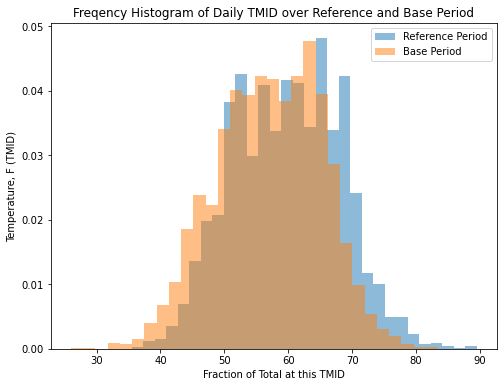

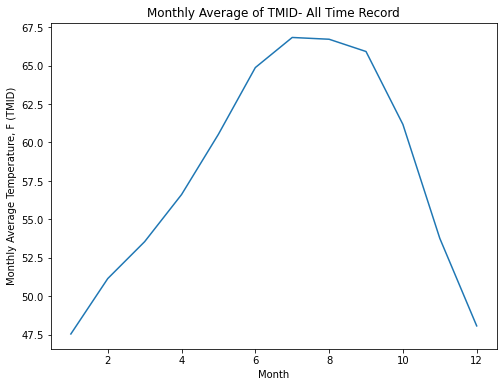

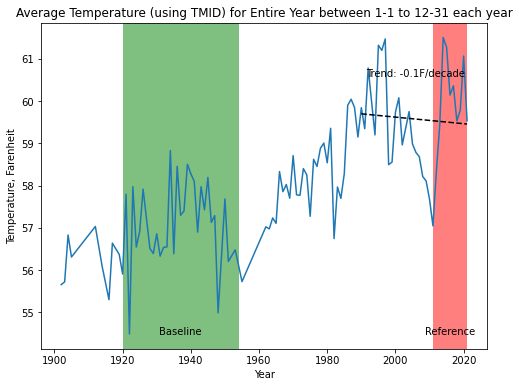

In [9]:
date1 = '2011-1-1'
date2 = '2021-12-31'
obcalc=analyze.StationAnalyzer(obdata.station_data,date1,date2,display=True)

In [10]:
sddata=load.LoadStation([32.741947,-117.239571],True) #Loading in Ocean Beach, San Diego coordinates

Searching closest station among 20 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1920
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USC00041758.csv (7.766818MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,37,39,41,43,45,47,49,51) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:7.0371363162994385
I dropped 1918.0 for having only 4 months of data.
I dropped 1950.0 for having less than 20 days in month #9.0
I dropped 1956.0 for having less than 20 days in month #12.0
I dropped 1962.0 for having less than 20 days in month #11.0
I dropped 1973.0 for having only 11 months of data.
I dropped 1989.0 for having only 11 months of data.
I dropped 1992.0 for having only 11 months of data.
I dropped 1998.0 for having only 9 months of data.
I dropped 1999.0 for having less than 20 days in month #9.0
I dropped 2002.0 for having less than 20 days in month #2.0
I dropped 2002.0 for having less than 20 days in month #3.0
I dropped 2003.0 for having only 11 months of data.
I dropped 2004.0 for having less than 20 days in month #3.0
I dropped 2004.0 for having less than 20 days in month #4.0
I dropped 2004.0 for having less than 20 days in month #9.0
I dropped 2004.0 for having less than 20 days in month #10.0
I dropped 2004.0 for having less than

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (25,27,29,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:6.161813974380493
I dropped 1909.0 for having only 3 months of data.
I dropped 1910.0 for having only 10 months of data.
I dropped 1911.0 for having only 7 months of data.
I dropped 1912.0 for having only 7 months of data.
I dropped 1913.0 for having only 11 months of data.
I dropped 1914.0 for having only 2 months of data.
I dropped 1919.0 for having less than 20 days in month #8.0
I dropped 1919.0 for having less than 20 days in month #9.0
I dropped 1919.0 for having less than 20 days in month #10.0
I dropped 1919.0 for having less than 20 days in month #11.0
I dropped 1919.0 for having less than 20 days in month #12.0
I dropped 1920.0 for having only 8 months of data.
I dropped 1921.0 for having only 10 months of data.
I dropped 1922.0 for having only 7 months of data.
I dropped 1923.0 for having only 7 months of data.
I dropped 1924.0 for having only 6 months of data.
I dropped 1925.0 for having only 6 months of data.
I dropped 1943.0 for having only 

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (17,19,21,23,31,33,35,37,41,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:6.051111936569214
I dropped 1899.0 for having less than 20 days in month #8.0
I dropped 1900.0 for having only 10 months of data.
I dropped 1901.0 for having only 3 months of data.
I dropped 1902.0 for having only 10 months of data.
I dropped 1905.0 for having only 11 months of data.
I dropped 1907.0 for having only 8 months of data.
I dropped 1908.0 for having only 6 months of data.
I dropped 1910.0 for having only 7 months of data.
I dropped 1912.0 for having less than 20 days in month #9.0
I dropped 1913.0 for having less than 20 days in month #2.0
I dropped 1914.0 for having only 9 months of data.
I dropped 1915.0 for having only 10 months of data.
I dropped 1917.0 for having only 10 months of data.
I dropped 1928.0 for having only 10 months of data.
I dropped 1939.0 for having less than 20 days in month #4.0
I dropped 1961.0 for having less than 20 days in month #4.0
I dropped 1967.0 for having less than 20 days in month #8.0
I dropped 1967.0 for hav

You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1903-1-1 to 2022-1-31,53.287877,211.594744,1943.06,"[1943-12-29, 1943-12-30]",-5.08,[1990-12-20]
1,Reference Period: 2011-1-1 to 2021-12-31,55.311682,153.784831,98.96,[2013-7-2],10.94,[2019-2-23]
2,Baseline Period: 1-1 to 12-31 in 1920 to 1954,53.251792,310.838016,1943.06,"[1943-12-29, 1943-12-30]",-4.00,[1949-1-25]


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,2.05F,7.490042e-12,True,0.01
1,30 year warming trend,0.89 Farenheit per decade,4.440132e-05,True,0.01


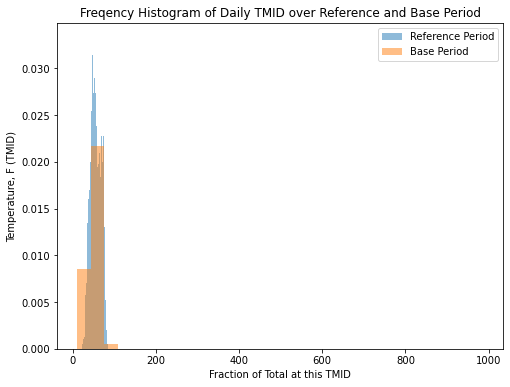

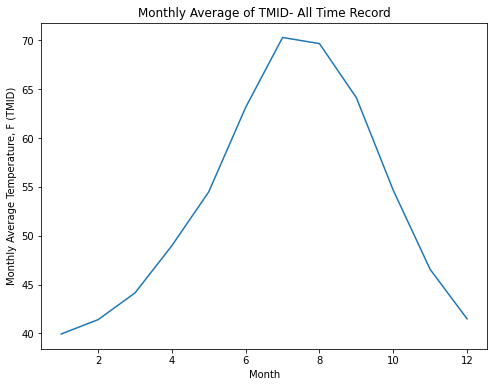

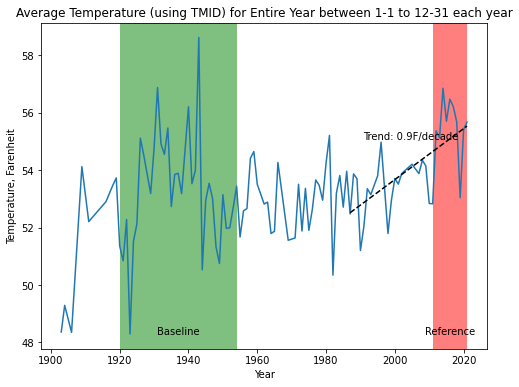

In [11]:
date1 = '2011-1-1'
date2 = '2021-12-31'
sdcalc=analyze.StationAnalyzer(sddata.station_data,date1,date2,display=True)

In [12]:
atldata=load.LoadStation([33.6639, -84.428],True) #Loading in ATlanta GA data

Searching closest station among 80 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1920
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USC00096335.csv (7.518409MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (17,19,25,29,31,33,35,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:6.729008436203003
I dropped 1891.0 for having only 2 months of data.
I dropped 1892.0 for having only 8 months of data.
I dropped 1893.0 for having only 8 months of data.
I dropped 1894.0 for having only 8 months of data.
I dropped 1900.0 for having less than 20 days in month #1.0
I dropped 1900.0 for having less than 20 days in month #2.0
I dropped 1900.0 for having less than 20 days in month #3.0
I dropped 1900.0 for having less than 20 days in month #4.0
I dropped 1900.0 for having less than 20 days in month #5.0
I dropped 1900.0 for having less than 20 days in month #6.0
I dropped 1900.0 for having less than 20 days in month #7.0
I dropped 1900.0 for having less than 20 days in month #8.0
I dropped 1900.0 for having less than 20 days in month #9.0
I dropped 1900.0 for having less than 20 days in month #10.0
I dropped 1916.0 for having less than 20 days in month #7.0
I dropped 1933.0 for having less than 20 days in month #11.0
I dropped 1944.0 for havi

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (31,33,35,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:6.407872438430786
I dropped 1904.0 for having only 8 months of data.
I dropped 1906.0 for having only 9 months of data.
I dropped 1907.0 for having only 7 months of data.
I dropped 1908.0 for having only 7 months of data.
I dropped 1909.0 for having only 4 months of data.
I dropped 1910.0 for having only 5 months of data.
I dropped 1939.0 for having only 7 months of data.
I dropped 1943.0 for having less than 20 days in month #12.0
I dropped 1944.0 for having less than 20 days in month #1.0
I dropped 1946.0 for having only 11 months of data.
I dropped 1947.0 for having less than 20 days in month #7.0
I dropped 1952.0 for having less than 20 days in month #9.0
I dropped 1953.0 for having only 9 months of data.
I dropped 1970.0 for having less than 20 days in month #12.0
I dropped 1973.0 for having less than 20 days in month #10.0
I dropped 1974.0 for having less than 20 days in month #7.0
I dropped 1974.0 for having less than 20 days in month #8.0
I droppe

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (17,19,23,25,27,29,31,33,35,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:6.474226474761963
I dropped 1891.0 for having only 1 months of data.
I dropped 1892.0 for having only 3 months of data.
I dropped 1893.0 for having only 7 months of data.
I dropped 1894.0 for having less than 20 days in month #1.0
I dropped 1894.0 for having less than 20 days in month #2.0
I dropped 1894.0 for having less than 20 days in month #3.0
I dropped 1894.0 for having less than 20 days in month #4.0
I dropped 1894.0 for having less than 20 days in month #5.0
I dropped 1894.0 for having less than 20 days in month #6.0
I dropped 1894.0 for having less than 20 days in month #8.0
I dropped 1894.0 for having less than 20 days in month #9.0
I dropped 1894.0 for having less than 20 days in month #10.0
I dropped 1894.0 for having less than 20 days in month #11.0
I dropped 1894.0 for having less than 20 days in month #12.0
I dropped 1895.0 for having only 11 months of data.
I dropped 1896.0 for having only 10 months of data.
I dropped 1897.0 for having onl

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (23,33,35,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:6.578293323516846
I dropped 1896.0 for having only 4 months of data.
I dropped 1898.0 for having only 11 months of data.
I dropped 1899.0 for having only 7 months of data.
I dropped 1900.0 for having only 7 months of data.
I dropped 1936.0 for having only 5 months of data.
I dropped 1937.0 for having less than 20 days in month #11.0
I dropped 1941.0 for having only 11 months of data.
I dropped 1945.0 for having less than 20 days in month #10.0
I dropped 1945.0 for having less than 20 days in month #11.0
I dropped 1954.0 for having only 8 months of data.
I dropped 2000.0 for having only 11 months of data.
I dropped 2001.0 for having less than 20 days in month #2.0
I dropped 2002.0 for having less than 20 days in month #1.0
I dropped 2005.0 for having only 11 months of data.
I dropped 2009.0 for having only 11 months of data.
I dropped 2013.0 for having only 11 months of data.
I dropped 2020.0 for having less than 20 days in month #7.0
Time to clean up this

C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (17,19,27,29,31,33,35,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:7.230945110321045
I dropped 1891.0 for having only 2 months of data.
I dropped 1892.0 for having only 8 months of data.
I dropped 1893.0 for having only 11 months of data.
I dropped 1894.0 for having only 8 months of data.
I dropped 1896.0 for having only 2 months of data.
I dropped 1897.0 for having only 5 months of data.
I dropped 1898.0 for having only 5 months of data.
I dropped 1899.0 for having only 5 months of data.
I dropped 1900.0 for having only 5 months of data.
I dropped 1901.0 for having less than 20 days in month #5.0
I dropped 1901.0 for having less than 20 days in month #6.0
I dropped 1901.0 for having less than 20 days in month #7.0
I dropped 1901.0 for having less than 20 days in month #8.0
I dropped 1901.0 for having less than 20 days in month #9.0
I dropped 1901.0 for having less than 20 days in month #10.0
I dropped 1910.0 for having less than 20 days in month #3.0
I dropped 1919.0 for having less than 20 days in month #1.0
I dropped 

You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1902-1-1 to 2022-2-6,59.923539,220.715052,107.06,"[1952-6-27, 1952-7-28, 1952-7-29]",-7.96,"[1966-1-30, 1985-1-21]"
1,Reference Period: 2011-1-1 to 2021-12-31,61.103741,196.002841,102.92,"[2012-6-30, 2012-7-1, 2012-7-2]",15.98,"[2011-1-9, 2011-1-10, 2011-1-15]"
2,Baseline Period: 1-1 to 12-31 in 1920 to 1954,60.382731,217.705355,107.06,"[1952-6-27, 1952-7-28, 1952-7-29]",-0.94,"[1928-1-2, 1940-1-28]"


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,0.72F,0.024223,False,0.01
1,30 year warming trend,0.03 Farenheit per decade,0.874018,False,0.01


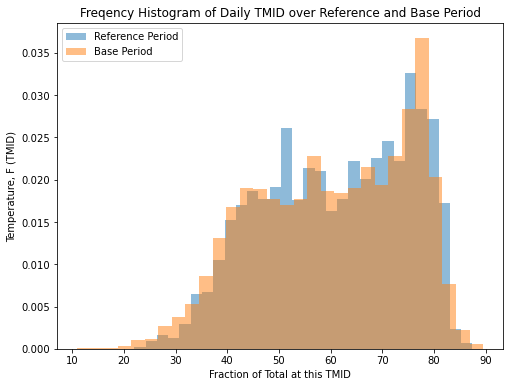

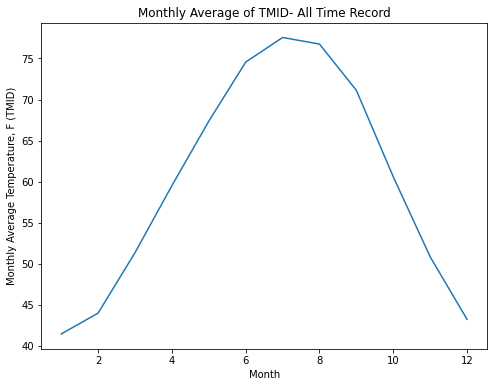

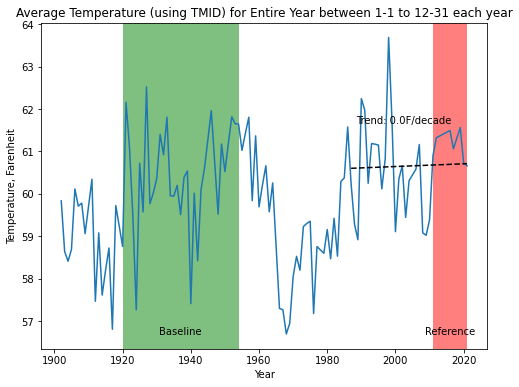

In [13]:
date1 = '2011-1-1'
date2 = '2021-12-31'
atlcalc=analyze.StationAnalyzer(atldata.station_data,date1,date2,display=True)

In [14]:
nycdata=load.LoadStation([40.730610, -73.935242],True) #Loading in New York City data

Searching closest station among 53 stations within 3 degrees of the reference.
which have more recent data than 2021 and at least as early as 1920
Beginning to download https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/USW00094728.csv (15.77556MB). Please wait while the file is transferred.


C:\Users\14154\OneDrive\Python\climate_mapper\python\climate_analyzer_ts\Station_Loader_ts.py:110: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  self.station_data=self.load_station(point)


Time to load this station data:7.721210718154907
Time to clean up this data:0.6392366886138916
-------------------------------------
Checking the completeness of the data.
Station ID# USW00094728, NY NEW YORK CNTRL PK TWR is complete. It's good to use.
This station is 3.7777425339078192 miles from the reference point.


You included more than one year in the reference period.
The analysis will include all days in each year included.
In order to avoid seasonal bias, I have to average over the entire year.
For example if you entered 2020 Jan 1 to 2021 July 1 as a reference,
this biases your result to be much warmer than average years


,Period of Measure,Average TMID over period (F),Variance of TMID over period (F),Maximum Temperature over period (F),Date of Maximum Temperature,Minimum Temperature over period (F),Date of Minimum Temperature
0,All Time:1869-1-1 to 2022-2-6,54.106448,311.912623,105.98,[1936-7-9],-14.98,[1934-2-9]
1,Reference Period: 2011-1-1 to 2021-12-31,56.403440,293.203672,104.00,[2011-7-22],-0.76,[2016-2-14]
2,Baseline Period: 1-1 to 12-31 in 1920 to 1954,54.201875,305.683247,105.98,[1936-7-9],-14.98,[1934-2-9]


,Metric,Value,P-Value of Difference,Statistically Significant?,Alpha Value
0,Reference Minus Basline Temperature Change,2.2F,2.730497e-12,True,0.01
1,30 year warming trend,0.63 Farenheit per decade,9.915739e-03,True,0.01


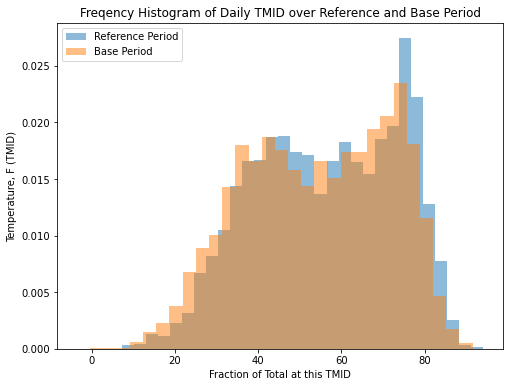

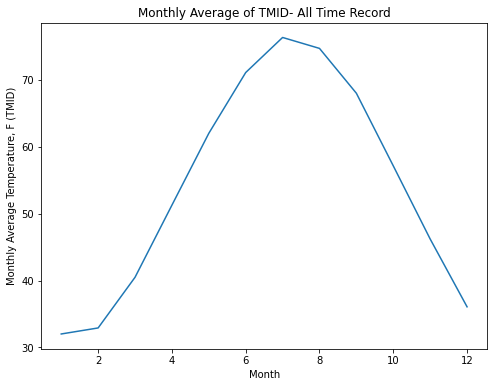

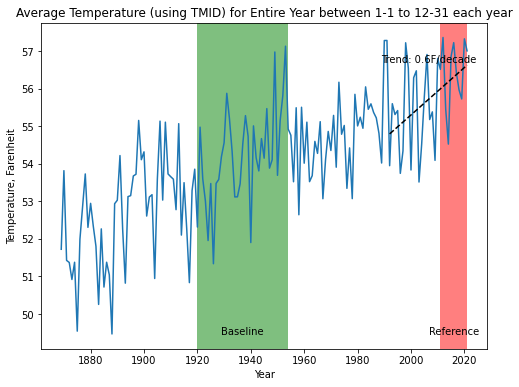

In [15]:
date1 = '2011-1-1'
date2 = '2021-12-31'
nyccalc=analyze.StationAnalyzer(nycdata.station_data,date1,date2,display=True)